### Identificando Outliers (Valores Extremos)

In [1]:
#pip install pyod

In [2]:
# Importando os pacotes que iremos utilizar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Documentação do conjunto de dados


# Carregando o conjunto de dados
df_original = pd.read_csv('base_nao_nula.csv')


df_original.head()

,Unnamed: 0,C006,M01401,M01501,E01602,VDF001,E017,D00901,A001,A002010,...,P01601,P018,P02002,P023,P02501,P02602,P02601,E001,P050,Q092
0,0,2.0,3.0,3.0,20000.0,2.0,40.0,13.0,2.0,1.0,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0
1,1,2.0,0.0,3.0,2000.0,2.0,20.0,12.0,1.0,2.0,...,4.0,4.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,1.0
2,2,2.0,3.0,2.0,2000.0,2.0,30.0,10.0,1.0,1.0,...,6.0,7.0,0.0,7.0,5.0,0.0,4.0,2.0,3.0,1.0
3,3,2.0,3.0,1.0,3001.0,2.0,50.0,12.0,2.0,1.0,...,7.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,1.0
4,4,2.0,3.0,2.0,2000.0,2.0,40.0,10.0,1.0,1.0,...,3.0,7.0,2.0,5.0,2.0,0.0,2.0,2.0,3.0,1.0


In [4]:
# Verificando as informações das variaveis e do conjunto de dados
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4558 entries, 0 to 4557
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4558 non-null   int64  
 1   C006        4558 non-null   float64
 2   M01401      4558 non-null   float64
 3   M01501      4558 non-null   float64
 4   E01602      4558 non-null   float64
 5   VDF001      4558 non-null   float64
 6   E017        4558 non-null   float64
 7   D00901      4558 non-null   float64
 8   A001        4558 non-null   float64
 9   A002010     4558 non-null   float64
 10  A003010     4558 non-null   float64
 11  A004010     4558 non-null   float64
 12  J007        4558 non-null   float64
 13  Q11006      4558 non-null   float64
 14  N00101      4558 non-null   float64
 15  P034        4558 non-null   float64
 16  P027        4558 non-null   float64
 17  J01101      4558 non-null   float64
 18  J014        4558 non-null   float64
 19  N010        4558 non-null  

In [5]:
# Verificando algumas medidas estatísticas
df_original.describe()

,Unnamed: 0,C006,M01401,M01501,E01602,VDF001,E017,D00901,A001,A002010,...,P01601,P018,P02002,P023,P02501,P02602,P02601,E001,P050,Q092
count,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000,4558.00000,4558.000000,...,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000,4558.000000
mean,2278.500000,1.640193,2.396665,1.783019,2012.192848,1.780386,36.383502,9.872532,1.16301,1.340281,...,2.541904,3.712154,1.541466,3.201404,2.085344,0.730364,3.048047,1.380430,2.757569,1.500000
std,1315.925593,0.479996,0.891876,1.216376,2436.940206,0.414030,13.062346,1.967530,0.37764,0.876287,...,2.407266,2.523201,1.992396,2.976652,2.301587,1.411854,0.730609,0.485546,0.633550,0.500055
min,0.000000,1.000000,0.000000,0.000000,20.000000,1.000000,1.000000,2.000000,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1139.250000,1.000000,2.000000,1.000000,1000.000000,2.000000,24.000000,8.000000,1.00000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,1.000000
50%,2278.500000,2.000000,3.000000,2.000000,1500.000000,2.000000,40.000000,10.000000,1.00000,1.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,3.000000,1.500000
75%,3417.750000,2.000000,3.000000,3.000000,2000.000000,2.000000,44.000000,12.000000,1.00000,1.000000,...,4.000000,7.000000,2.000000,7.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000
max,4557.000000,2.000000,3.000000,3.000000,60000.000000,2.000000,102.000000,15.000000,3.00000,6.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,2.000000,3.000000,2.000000


In [6]:
colunas_relevantes = [
    'E01602', 'P00104',
    'P00404',
]



# Seleciona apenas as colunas relevantes
df_original = df_original[colunas_relevantes]

In [7]:
df2 = df_original

In [8]:
#df2 = df2.dropna(subset=['J01002'])

In [9]:

import sidetable as stb

# Resumo dos valores nulos por coluna
df2.stb.missing().round(2)

,missing,total,percent
E01602,0,4558,0.0
P00104,0,4558,0.0
P00404,0,4558,0.0


### Identificando Outliers com a Biblioteca PYOD

In [10]:
# Caso ainda não tenha instalado a biblioteca PYOD para instalar digite: !pip install pyod

# Importando o pacote PYOD
from pyod.models.knn import KNN

In [11]:
# Instanciando o objeto KNN
detector = KNN()

# Treinando um detector de OUTLIERS
detector.fit(df2)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [12]:
# A probiedade LABELS_ retorna um ARRAY com 0 e 1
# 0 significa que NÃO é outlier
# 1 significa que É outlier
previsoes = detector.labels_
previsoes

array([1, 0, 0, ..., 0, 0, 0])

In [13]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([4102,  456], dtype=int64))

In [14]:
# Observando o calculo da distancia realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([21.02379604,  2.        ,  2.        , ...,  4.47213595,
        6.        ,  2.23606798])

In [15]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [16]:
# Lista com os ID´s dos registros que foram considerados OUTLIERS
print(outliers)

[0, 5, 8, 17, 34, 43, 45, 48, 55, 59, 64, 74, 77, 80, 113, 116, 134, 142, 148, 157, 169, 170, 173, 179, 183, 195, 236, 239, 243, 251, 259, 276, 285, 293, 310, 327, 335, 366, 369, 380, 388, 404, 409, 420, 430, 436, 444, 457, 461, 473, 475, 490, 491, 494, 509, 523, 525, 532, 534, 564, 574, 602, 604, 610, 619, 657, 663, 687, 688, 702, 703, 718, 755, 773, 774, 789, 798, 875, 911, 917, 929, 931, 935, 948, 971, 974, 977, 990, 993, 1002, 1006, 1021, 1033, 1035, 1039, 1069, 1072, 1085, 1092, 1103, 1109, 1110, 1112, 1119, 1131, 1139, 1150, 1151, 1167, 1179, 1184, 1200, 1203, 1210, 1219, 1237, 1254, 1261, 1267, 1268, 1280, 1297, 1310, 1314, 1323, 1326, 1327, 1341, 1346, 1354, 1355, 1359, 1361, 1363, 1368, 1377, 1381, 1401, 1405, 1440, 1454, 1462, 1465, 1476, 1480, 1486, 1489, 1502, 1505, 1513, 1525, 1533, 1545, 1569, 1571, 1572, 1585, 1586, 1590, 1607, 1618, 1631, 1638, 1645, 1648, 1649, 1674, 1679, 1684, 1691, 1695, 1696, 1700, 1715, 1723, 1737, 1748, 1750, 1751, 1754, 1790, 1810, 1811, 1814, 1

In [17]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outlier (lista de outlier) e todas colunas
lista_outliers = df_original.iloc[outliers,:]
lista_outliers

,E01602,P00104,P00404
0,20000.0,72.0,169.0
5,2250.0,66.0,163.0
8,4300.0,87.0,173.0
17,2200.0,90.0,158.0
34,950.0,68.0,154.0
...,...,...,...
4524,2500.0,87.0,200.0
4526,6500.0,64.0,167.0
4531,175.0,59.0,173.0
4532,7400.0,58.0,173.0


In [18]:
lista_outliers.shape

(456, 3)

In [19]:
df_original['E01602'].mean()

2012.1928477402369

In [20]:
# Usando NumPy
std_dev_numpy = np.std(df_original['E01602'], ddof=1)  # ddof=1 para amostra
print(f"Desvio Padrão (NumPy): {std_dev_numpy:.2f}")

Desvio Padrão (NumPy): 2436.94


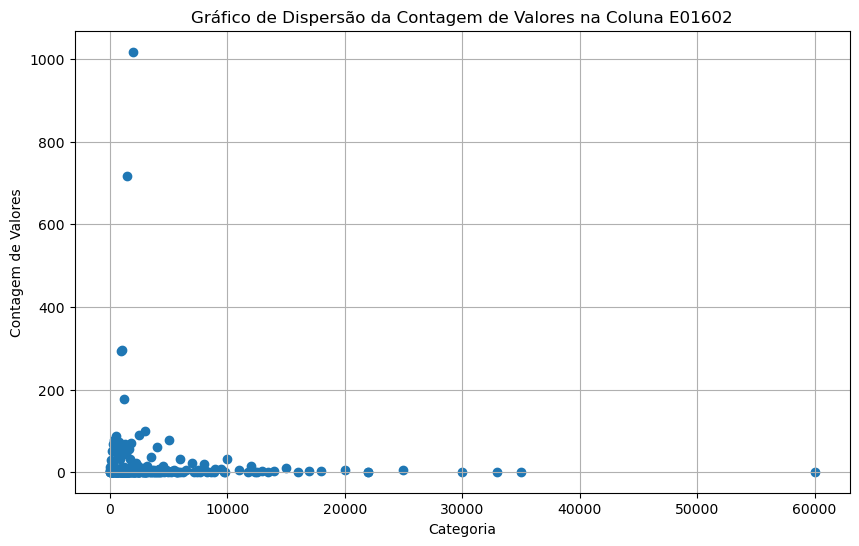

In [21]:
# Contar valores em 'E01602'
value_counts = df_original['E01602'].value_counts()
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(value_counts.index, value_counts.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores na Coluna E01602')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()